# Part II - (Prosper Loan Data Exploration)
## by (Adetola Adelase)


## Investigation Overview
> In this investigation, I wanted to look at the borrowers features (such as loan amount,  Prosper rating, credit type, stated monthly income, and employment status) and determine which that has the most impact on chances of loan default and also have the most impact on loan performance. 


## Dataset Overview
> The prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. In this project I explored 10 -15 variables in the dataset which was used in analysing the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('/home/axe_rhitta/ProsperLoanData.csv')

# Selecting features of interest from the dataframe
selected_columns =  [
    'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

df_loan1 = df_loan[selected_columns]

## (Visualization 1)
### Observation 
> The majority of the loans in the dataset are current loans. Based on the length of the payment delay, past due loans are divided into numerous classes. Completed loans make up a significant portion of the total; defaulted loans make up a small percentage, but charged-off loans make up a significant portion as well.

> The majority of borrowers are employed, with all other categories accounting for only a minor percentage of total borrowers. Full-time work has the highest priority in small groups, followed by self-employed workers, and so on.

> The length of most of the loans are 36 months, followed by 60 months.

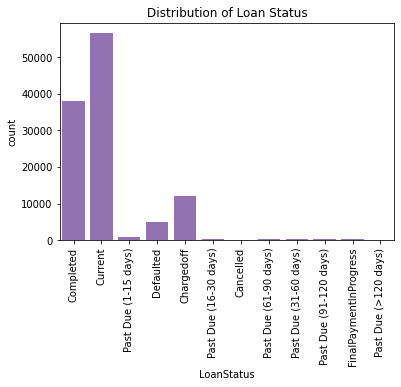

In [3]:
norm_color = sb.color_palette()[4]
plt.xticks(rotation=90)
sb.countplot(data = df_loan1, x = 'LoanStatus', color = norm_color)
plt.title('Distribution of Loan Status');

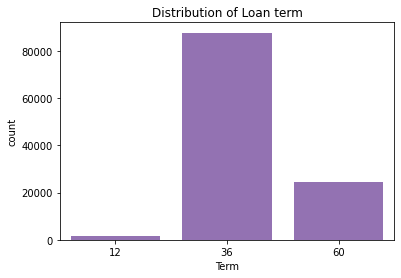

In [4]:
sb.countplot(data = df_loan1, x = 'Term', color = norm_color)
plt.title('Distribution of Loan term');

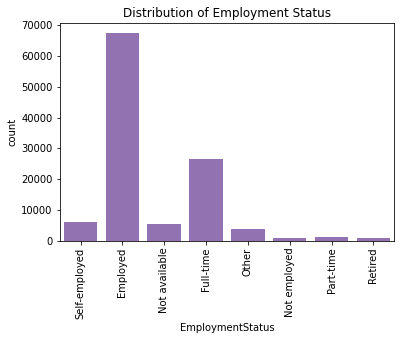

In [5]:
sb.countplot(data = df_loan1, x = 'EmploymentStatus', color = norm_color);
plt.title('Distribution of Employment Status');
plt.xticks(rotation = 90);

## (Visualization 2)
### Observation

> Individuals with employment statuses of Not Employed, Self-employed, Retired, and Part-Time appear to be more prevalent in lower ratings.

> Because most of the values in the variable Listing Category are quite rare, we changed it to categorical and reduced the number of categories to make it easier to visualise. Debt consolidation has the highest frequency of all of the changed listing options and startup having the lowest frequency in both graph.

> When borrowers with other types of jobs are compared, it can be seen that those who are employed have higher loan amounts. Retired and unemployed borrowers, on the other hand, have accepted smaller loans than those in other employment categories.

In [6]:
# Adjusting the form of the data
con = (df_loan1['LoanStatus'] == 'Completed') | (df_loan1['LoanStatus'] == 'Defaulted') |\
                  (df_loan1['LoanStatus'] == 'Chargedoff')
df_loan1 = df_loan1[con]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df_loan1['LoanStatus'] = df_loan1.apply(change_to_defaulted, axis=1)
df_loan1['LoanStatus'].value_counts()

categories = {1: 'Debt Consolidation', 2: 'Car loans', 3: 'Insurance', 6: 'Startups', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
df_loan1['ListingCategory (numeric)'] = df_loan1.apply(reduce_categorie, axis=1)
df_loan1['ListingCategory (numeric)'].value_counts()

Other                 28177
Debt Consolidation    17867
Insurance              4257
Car loans              3244
Startups               1539
Name: ListingCategory (numeric), dtype: int64

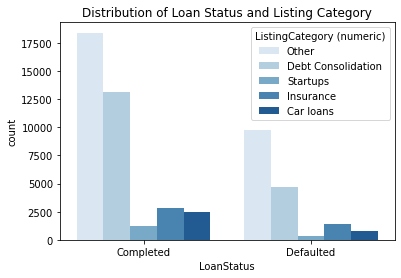

In [7]:
sb.countplot(data = df_loan1,  hue = 'ListingCategory (numeric)', x = 'LoanStatus', palette = 'Blues');
plt.title('Distribution of Loan Status and Listing Category');

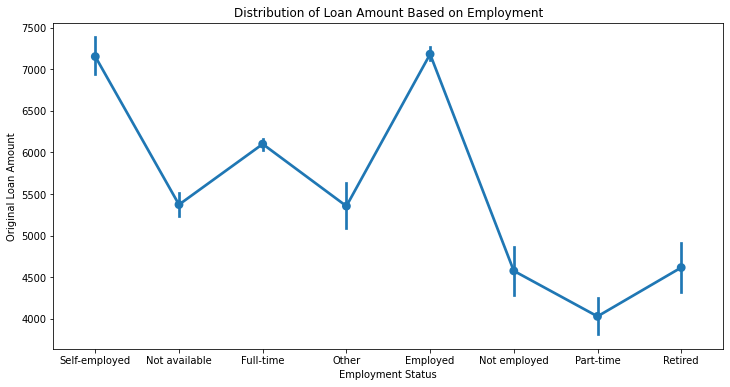

In [8]:
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=df_loan1)
plt.title('Distribution of Loan Amount Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Original Loan Amount')
plt.show()

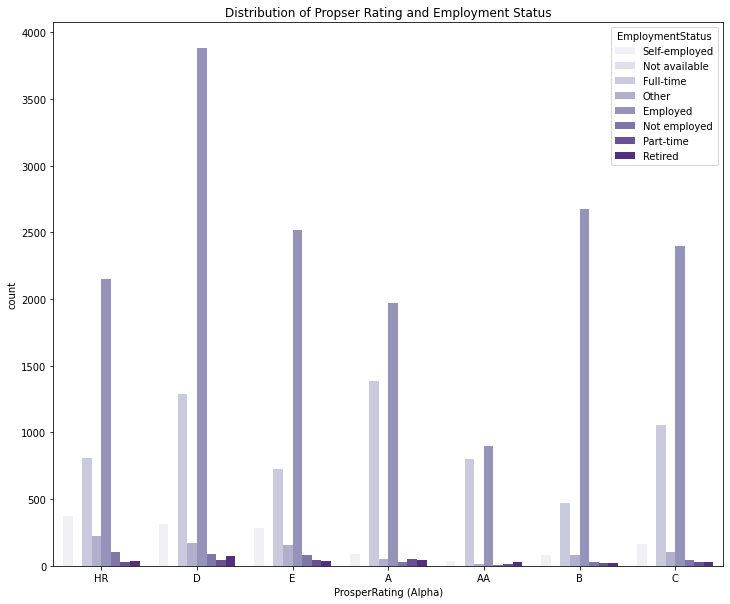

In [9]:
plt.figure(figsize = [12, 10])
sb.countplot(data = df_loan1, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Purples');
plt.title('Distribution of Propser Rating and Employment Status');

## (Visualization 3)
### Observation
> Defaulted credits, with the exception of the lowest ratings, are usually greater than completed credits. Individuals with a low Prosper rating account for the majority of defaulted credits.
> Except Startups, Insurance and Car loans, none of them have roughly comparable mean. Insurance category tend to have bigger amount.


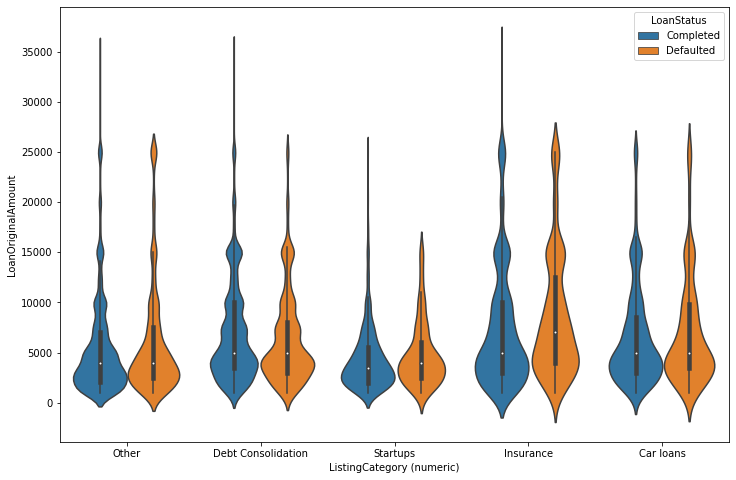

In [10]:
plt.figure(figsize = [12, 8])
sb.violinplot(data=df_loan1, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

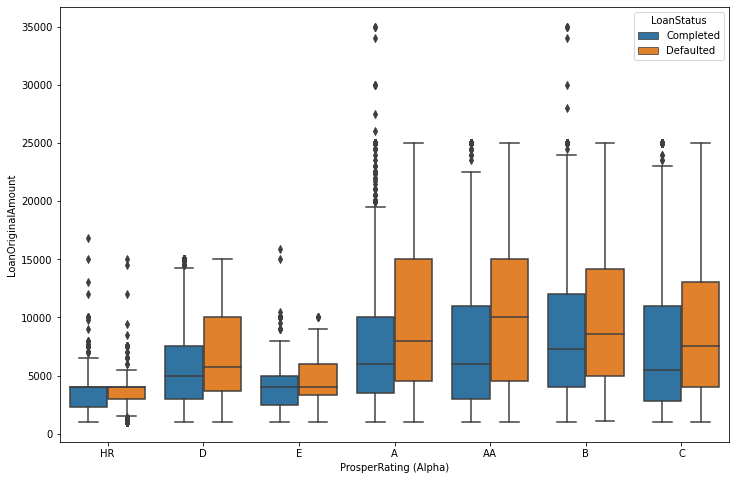

In [11]:
plt.figure(figsize = [12, 8])
sb.boxplot(data=df_loan1, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

In [ ]:
!jupyter nbconvert Communicate-Data-Findings-Slide-Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Communicate-Data-Findings-Slide-Deck.ipynb to slides
[NbConvertApp] Writing 576642 bytes to Communicate-Data-Findings-Slide-Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Communicate-Data-Findings-Slide-Deck.slides.html
Use Control-C to stop this server
